# Polling

In Nate Silver's book, [The Signal and the Noise](https://www.amazon.com/Signal-Noise-Many-Predictions-Fail-but/dp/0143125087/), he examines several reasons why the business of making forecasts is a subtle and difficult propisistion.  One place where forecasts are notoriously problematic is in polling.  Theoretically a well done poll should make a good prediction of how a vote will turn out.  In reality, many biases and systematic errors effect polls.  When polling is done well, there's still a strong lag effect, where even two months out a good poll becomes very noisy.  

### In this simulation, I want to examine potential polling errors.

- Given a sample size N, what is the expected error?
- Given a sample size N, and binomial distribution, how good do we expect the estimated mean to be? 
- Given a sample size N, and a 10% error rate, what is the expected error?
- Given a sample size N, and a stochastic error, how good do we expect the estimated mean to be?
- How do the above quantities vary with sample size and number of trials?

### Goals

- Show that repeated ideal polling trials (with N = 100 people) produce estimates of the real mean and standard deviation
- Examine repeated polling trials (with N = 100 people) with added stochastic noise

### Conclusions

- If we increase the number of people polled, the expected percent error in the poll goes doesn as $\sqrt{N}$
- Simulatng trials from a stochastic noise model yields valid estimates of the new mixed distribution


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### What is the experiment?

- if we're polling a population with a simple yes/no response we expect to have a binomial distribution
- it's easy to directly sample this with binomial(n,p,return_value)
- however, I also want to enable simulating an error in the sampling, so I'm adding a stochastic sampling from a binomial with n = 1; p = 0.5 

In [4]:
# Function to get a sample from an approximatley binomial distribution
def get_sample(n=50, p=0.7, error=0.1):
    def _sample():
        if np.random.random()>error:
            return np.random.binomial(1,p)
        else:
            return np.random.binomial(1,0.5)
    return [_sample() for i in range(n)]

### Looking at the Sample Mean

- if we poll N people, how accurate should we expect this poll to be?
- If the distribution is binomial, the sample mean is an estimate for the true mean $np$ with a standard deviation of $\sqrt{npq}$

In [76]:
# Let's calcualte the expected sample mean and the expected standard deviation
# We'll start with N = 10 people => 14% error expected in the poll estimate of the mean
N = 10
p = 0.7
_smean0 = N*p
_sstd0 = np.sqrt(N*p*(1-p))
print("Expected Sample Mean: {0:2.2f}".format(_smean0))
print("Expected Sample Std:  {0:2.2f}".format(_sstd0))
print("Standard deviation as a percent: +/- {0:2.2f}".format(_sstd0/N))

Expected Sample Mean: 7.00
Expected Sample Std:  1.45
Standard deviation as a percent: +/- 0.14


In [79]:
# Let's calcualte this again with 100 people
# => 5% error expected in the estimate
N = 100
p = 0.7
_smean = N*p
_sstd = np.sqrt(N*p*(1-p))
print("Expected Sample Mean: {0:2.2f}".format(_smean))
print("Expected Sample Std:  {0:2.2f}".format(_sstd))
print("Standard deviation as a percent: +/- {0:2.2f}".format(_sstd/N))

Expected Sample Mean: 70.00
Expected Sample Std:  4.58
Standard deviation as a percent: +/- 0.05


In [6]:
# Ok, lets look at a sample, with no systematic polling error (error = 0)
s1 = pd.DataFrame( {'sample1' : get_sample(n=N, p=p, error=0.0)})

In [7]:
# What does the data look like:
s1.head()

,sample1
0,1
1,1
2,1
3,1
4,1


In [8]:
# This is our poll mean, which can be considerd as equivalent to an estimate for percentage with N = 100
s1.sample1.sum()

67

In [72]:
# How would this result differ if we polled N=1000 people?
# In this case the expected error goes to 1%
N = 1000
p = 0.7
_smean2 = N*p
_sstd2 = np.sqrt(N*p*(1-p))
print("Expected Sample Mean: {0:2.2f}".format(_smean2))
print("Expected Sample Std:  {0:2.2f}".format(_sstd2))
print("Standard deviation as a percent: +/- {0:2.2f}".format(_sstd2/N))

Expected Sample Mean: 700.00
Expected Sample Std:  14.49
Standard deviation as a percent: +/- 0.01


In [78]:
# Let's do this one more time.  How would this result differ if we polled N=10000 people?
# The error is now about half a percent
N = 10000
p = 0.7
_smean3 = N*p
_sstd3 = np.sqrt(N*p*(1-p))
print("Expected Sample Mean: {0:2.2f}".format(_smean3))
print("Expected Sample Std:  {0:2.2f}".format(_sstd3))
print("Standard deviation as a percent: +/- {0:2.4f}".format(_sstd3/N))

Expected Sample Mean: 7000.00
Expected Sample Std:  45.83
Standard deviation as a percent: +/- 0.0046


### Estimating the true population mean

If we take repeated samples, we can see how our well our estimate converges to the true mean.
For example, if we do 50 polls, we'd expecte the error of the sample mean to be $\sigma / \sqrt{N}$

In [9]:
s20 = pd.DataFrame()
for i in range(20):
    col='s'+str(i)
    s20[col]= get_sample(n=N, p=p, error=0.0)


In [10]:
s20.head(3)

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19
0,1,1,1,1,1,1,0,1,0,1,0,1,1,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0,1,0,1,1,0,0,1,1,1,1,1,1


In [11]:
# The sum of the columns is our results.  20 repitions of N=100 samples
results = pd.DataFrame( {'estimate' : s20.sum(0)})
results.head()

,estimate
s0,60
s1,70
s2,80
s3,75
s4,65


In [14]:
# After 20 polls, our mean should become a better estimate - with it's own standard deviation of sigma/sqrt(N-1)
print(results.estimate.mean())
# The theoreitcal standard deviation of the estimate: sigma/sqrt(N-1)
print("The estimate of the mean is likely to be within {0:2.2f} of the true mean".format(_sstd/np.sqrt(20-1)))

70.75
The estimate of the mean is likely to be within 1.05 of the true mean


In [15]:
# This estimates the actual standard deviation
print("The estimate of the standard devaition is {0:2.2f}".format(results.estimate.std()))


The estimate of the standard devaition 5.35


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112256110>]],
      dtype=object)

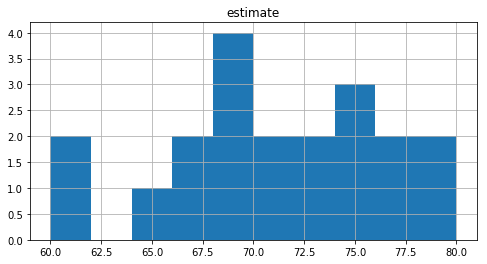

In [17]:
# we can take a quick look at the histogram
results.hist(figsize=(8,4))

In [22]:
# Let's do this for a larger set of simulations, say 100
s100 = pd.DataFrame()
for i in range(100):
    col='s'+str(i)
    s100[col]= get_sample(n=N, p=p, error=0.0)
r100 = pd.DataFrame( {'estimate' : s100.sum(0)})

In [25]:
# The estimate mean should be a slightly better estimate of the real mean withing sigma/sqrt(100 - 1)
print("Real mean likely to be within {0:2.2f} of estimate of the mean".format(_sstd/np.sqrt(100-1)))
print("100 Trials, mean of the estimate {0:2.2f}".format(r100.estimate.mean()))
print("100 Trials, standard deviation of the estimate {0:2.2f}".format(r100.estimate.std()))

Real mean likely to be within 0.46 of estimate of the mean
100 Trials, mean of the estimate 69.08
100 Trials, standard deviation of the estimate 4.76


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112402850>]],
      dtype=object)

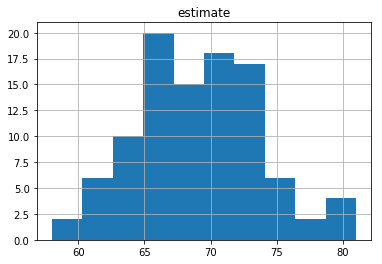

In [26]:
r100.hist()

In [35]:
# And again for a larger set of simulations, say 1000
s1000 = pd.DataFrame()
for i in range(1000):
    col='s'+str(i)
    s1000[col]= get_sample(n=N, p=p, error=0.0)
r1000 = pd.DataFrame( {'estimate' : s1000.sum(0)})

In [36]:
# The estimate mean should be a slightly better estimate of the real mean withing sigma/sqrt(1000 - 1)
print("Real mean likely to be within {0:2.2f} of estimate of the mean".format(_sstd/np.sqrt(1000-1)))
print("1000 Trials, mean of the estimate {0:2.2f}".format(r1000.estimate.mean()))
print("1000 Trials, standard deviation of the estimate {0:2.2f}".format(r1000.estimate.std()))

Real mean likely to be within 0.14 of estimate of the mean
1000 Trials, mean of the estimate 70.10
1000 Trials, standard deviation of the estimate 4.44


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1129722d0>]],
      dtype=object)

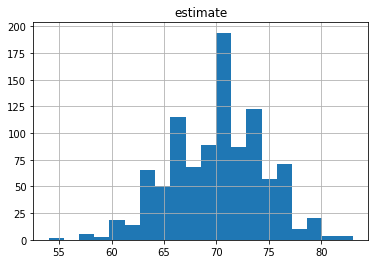

In [37]:
r1000.hist(bins=20)

## Add in stochastic noise

What if in a real poll with a binary y/n type question, there's a systematic polling error?  For example, what if 10% of the population misinterprets the question, or misreads the question.  How would this effect our polling results?

In this model, say, 90% of the polling is expected to sample from the true distribution $B_p$ while 10% is expected to sample stochastically from $B_{0.5}$

We can calculate the true Expected mean as $E[X] = 0.9 \times E[X ~ B_p] + 0.1 \times E[X ~ B_{0.5}] = 0.68 $ 

In [46]:
# Real expected mean:
0.9*0.7 + 0.1 * 0.5

0.68

In [47]:
# Let's start with doing 20 trials
# However, now there's a 10% polling error rate, that is, 10% of respondents answer randomly
ss20 = pd.DataFrame()
for i in range(20):
    col='s'+str(i)
    ss20[col]= get_sample(n=N, p=p, error=0.1)


In [48]:
# For a single trial, we expect the mean to go down from 70 to something closer to 68
ss20.s0.sum()

67

In [49]:
rs20 = pd.DataFrame( {'estimate' : ss20.sum(0)})

In [50]:
# The estimate mean should now *NO LONGER ESTIMATE*  the real distribution, mean withing sigma/sqrt(20 - 1)
print("Ideally, real mean woulbd likely to be within {0:2.2f} of estimate of the mean".format(_sstd/np.sqrt(20-1)))
print("However, ")
print("20 Trials, mean of the estimate {0:2.2f}".format(rs20.estimate.mean()))
print("20 Trials, standard deviation of the estimate {0:2.2f}".format(rs20.estimate.std()))

Ideally, real mean woulbd likely to be within 1.05 of estimate of the mean
However, 
20 Trials, mean of the estimate 69.05
20 Trials, standard deviation of the estimate 3.69


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112eb1110>]],
      dtype=object)

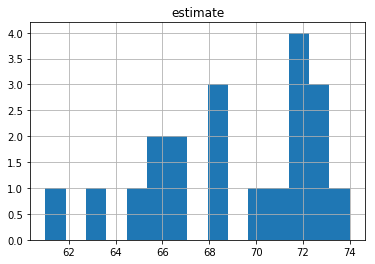

In [52]:
rs20.hist(bins=15)

In [57]:
# Let's do 1 more.  1000 trials with N=100, from a mixture: 70% binomial distribution, and 50% binomial
# However, now there's a 10% polling error rate, that is, 10% of respondents answer randomly
ss1000 = pd.DataFrame()
for i in range(1000):
    col='s'+str(i)
    ss1000[col]= get_sample(n=N, p=p, error=0.1)
rs1000 = pd.DataFrame( {'estimate' : ss1000.sum(0)})

In [58]:
# 1000 trials from our stochastic mixture
print("Ideally, real mean would likely to be within {0:2.2f} of estimate of the mean".format(_sstd/np.sqrt(1000-1)))
print("However, ")
print("1000 Trials, mean of the estimate {0:2.2f}".format(rs1000.estimate.mean()))
print("1000 Trials, standard deviation of the estimate {0:2.2f}".format(rs1000.estimate.std()))

Ideally, real mean would likely to be within 0.14 of estimate of the mean
However, 
1000 Trials, mean of the estimate 67.87
1000 Trials, standard deviation of the estimate 4.62


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11363c750>]],
      dtype=object)

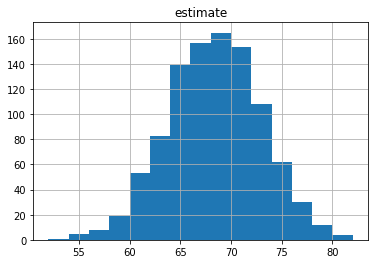

In [84]:
# With 10% noise - the true mean is shifted from the actual population distribution, 70% to 68%
rs1000.hist(bins=15)

### Let's create another stochastic model

What if the true population distribution was heavily for something, say p = 0.85, or 85% of the population would actually agree with the question.  However, let's say the systematic error is higher, say 20%, that is 20% will misread the question?  

What would the data show in this case?

In this case the conclusions from the poll trials would be quite different from the real underlying distribution.




In [62]:
# The real expected mean:
ss2_mean = 0.8*0.85 + 0.2 * 0.5
ss2_mean

0.78

In [68]:
# Let's do 1 more.  1000 trials with N=100, from a mixture: 70% binomial distribution, and 50% binomial
# However, now there's a 10% polling error rate, that is, 10% of respondents answer randomly
ss2 = pd.DataFrame()
for i in range(1000):
    col='s'+str(i)
    ss2[col]= get_sample(n=N, p=0.85, error=0.2)
rs2 = pd.DataFrame( {'estimate' : ss2.sum(0)})

In [69]:
# Ok, 1000 trials were performed from our new stochastic mixture
# This is a new rough estimate of the std

_ss2_std=np.sqrt(N*0.85*.015)
print("Ideally, real mean would likely to be within {0:2.2f} of estimate of the mean".format(_ss2_std/np.sqrt(1000-1)))
print("However, ")
print("1000 Trials, mean of the estimate {0:2.2f}".format(rs2.estimate.mean()))
print("1000 Trials, standard deviation of the estimate {0:2.2f}".format(rs2.estimate.std()))

Ideally, real mean would likely to be within 0.04 of estimate of the mean
However, 
1000 Trials, mean of the estimate 78.25
1000 Trials, standard deviation of the estimate 4.13


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1135a5750>]],
      dtype=object)

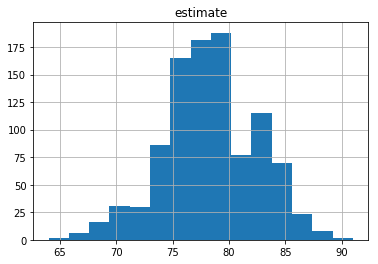

In [85]:
# Now - with this 20% noise, and the actual population distribution with p of 85%, the 
# samples would no longer give a good estimate of the real population mean
rs2.hist(bins=15)